## Modeling
#### Nesta fase os dados foram preparados para integração em modelos de machine learning na fase de Modeling
#### As séries temporais "male", "female", "young" e "adult" foram retiradas dos dados uma vez que o nosso objetivo é orientado para a série "all"
#### A coluna "date" também foi removida porque apenas serve para nos situarmos no tempo, para a divisão dos dados em antigos=treino, recentes=teste. Além disso a sua natureza única (única por observação) apenas iria trazer incerteza para os modelos.
#### Para lidar com os valores outliers foram criados 2 cenários:
<ul>
    <li><b>Com outliers</b> - Neste cenário os valores outliers não foram tratados</li>
    <li><b>Sem outliers s/ compensação</b> - Neste cenário os valores outliers foram tratados</li>

</ul>

#### Por fim os dados de cada cenário foram exportados para os respetivos ficheiros csv para poderem ser utilizados nas fases seguintes 

### Importar Libraries

In [2]:
# Importar Libraries
library(tidyverse)
library(rminer)
library(forecast)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'rminer' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


### Importar os Dados

In [3]:
# Importar os dados
data <- read.csv(file = './cenarios/Cenario 2/TS4.csv')

# Retirar a coluna X (Index)
data = data %>% select(-X)
head(data)

young,weather,maxtemp,RH,maxwind
1122,0,13,87,0
1239,0,14,94,45
1059,0,14,82,55
1606,1,13,78,0
2318,0,16,81,37
2289,0,16,73,0


## Multivariate Regression

### Spliting the dataset (For multivariate models)

In [193]:
# Separação dos índices do dataframe ordenada cronologicamente (porque os dados já estão em ordem cronológica), usando 250
# observações para treino e 7 para teste
H=holdout(data$all,ratio=7,mode="order")
H

# Seleção dos dados de Treino
train = data[H$tr,]
cat("Dados de treino:\n")
cat("Head: ", head(train$all),"\n")
cat("Length: ", length(train$all),"\n\n")

# Seleção dos dados de Teste
test = data[H$ts,]
cat("Dados de teste:\n")
cat("Head: ", head(test$all),"\n")
cat("Length: ", length(test$all))

ERROR: Error in 1:TRS: NA/NaN argument


### Modelos de Regressão Multivariados

#### Random Forest

In [20]:
RF=fit(all~.,train,model="randomForest")
Target = test$all
cat("Target Values:",Target,"\n")

Pred = predict(RF,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Random Forest")
mae=round(mmetric(Target,Pred,metric="MAE"),2)
nmae=round(mmetric(Target,Pred,metric="NMAE"),2)
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

Warning message in fit(all ~ ., train, model = "randomForest"):
"fit failed: Error in randomForest.default(m, y, ...) : 
  Can not handle categorical predictors with more than 53 categories.
 fit(x = all ~ ., data = train, model = "randomForest")"

Target Values: 4974 3228 3191 4153 4307 4660 6193 


ERROR: Error in meanf(object, h = h, level = level, fan = fan, lambda = lambda, : unused argument (type = type)


#### Multiple Linear Regression

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 4973.457 3228.28 3190.593 4152.865 4306.277 4660.187 6192.275 
MAE: 0.43 
NMAE: 0.01 


METRICA_MODELO,MR_Simples
MAE,0.43
NMAE,0.01


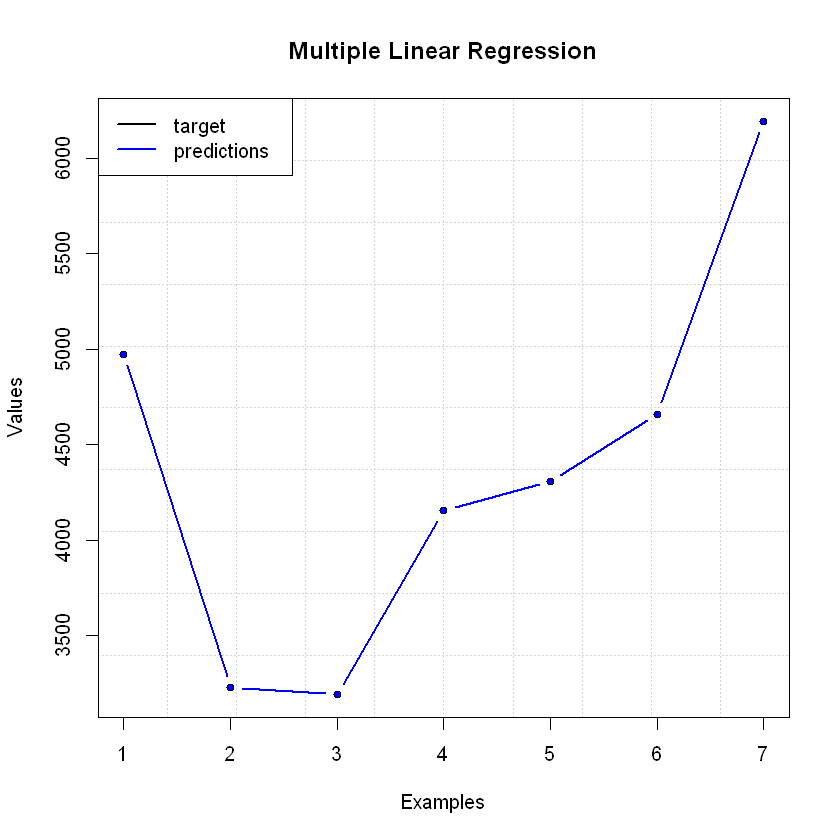

In [21]:
MR=fit(all~.,train,model="mr")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Multiple Linear Regression")

# Metricas
mae=round(mmetric(Target,Pred,metric="MAE"),2)
nmae=round(mmetric(Target,Pred,metric="NMAE"),2)
cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### KSVM

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3665.982 4028.064 3091.614 3316.601 2719.406 3747.76 3692.589 
MAE: 1149.16 
NMAE: 38.28 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples
MAE,1080.96,1568.75,1149.16
NMAE,36.01,52.26,38.28


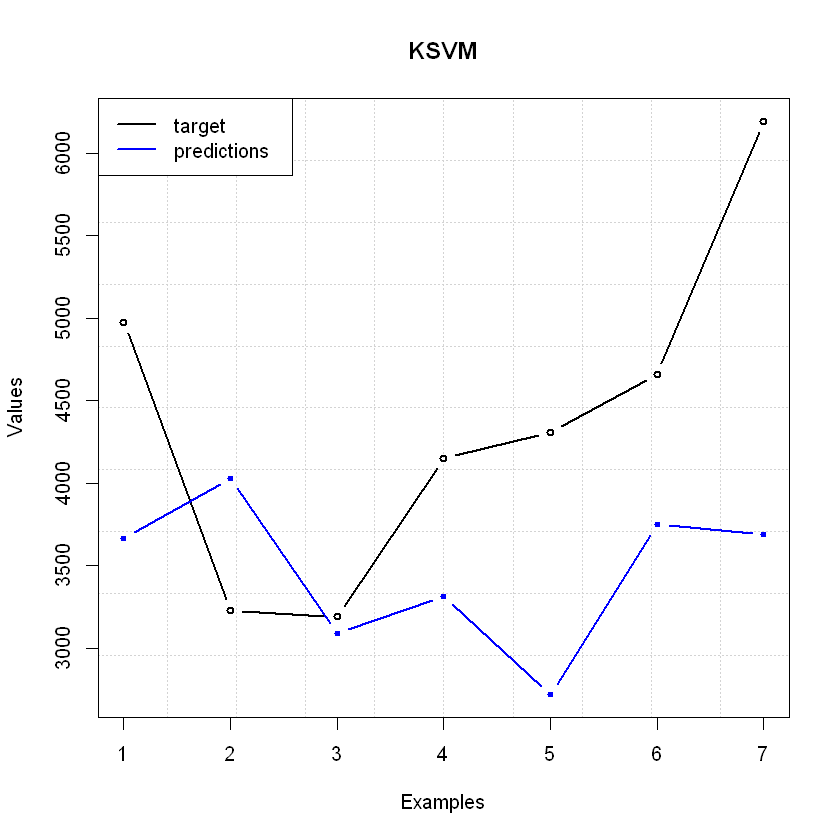

In [512]:
MR=fit(all~.,train,model="ksvm")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="KSVM")

# Metricas
mae=round(mmetric(Target,Pred,metric="MAE"),2)
nmae=round(mmetric(Target,Pred,metric="NMAE"),2)
cat("MAE:",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE:",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

#### MLPE

Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3874.579 3874.579 2832.758 3874.579 2832.322 4028.086 4028.086 
MAE: 950.6 
NMAE: 31.67 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples
MAE,1080.96,1568.75,1149.16,950.60
NMAE,36.01,52.26,38.28,31.67


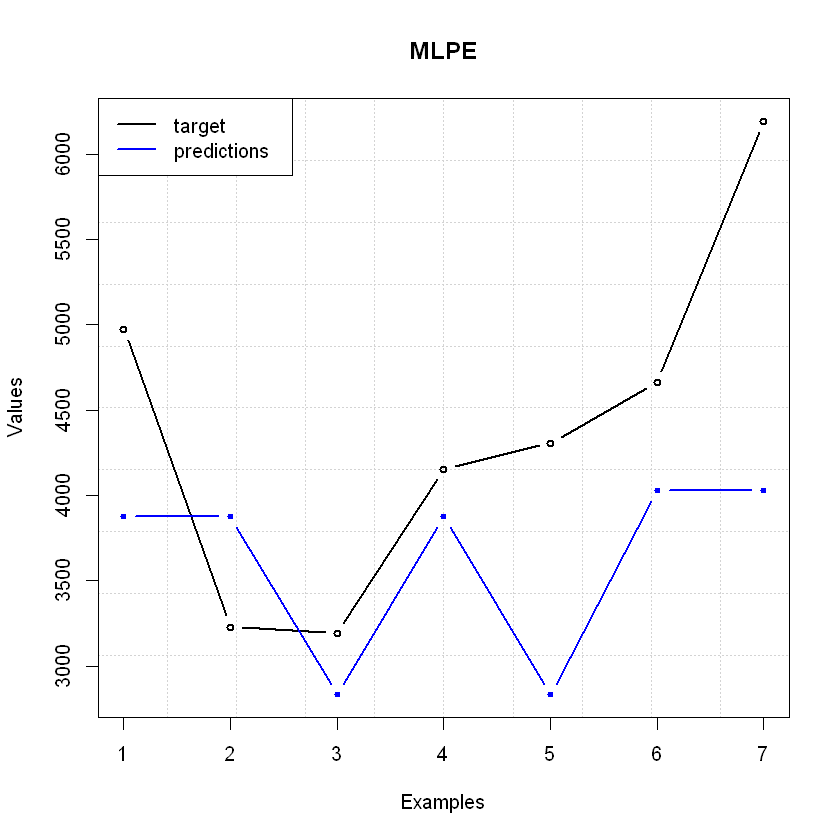

In [513]:
MR=fit(all~.,train,model="mlpe")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="MLPE")

# Metricas
mae=round(mmetric(Target,Pred,metric="MAE"),2)
nmae=round(mmetric(Target,Pred,metric="NMAE"),2)
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "MLPE_simples"
resdf[nomeModelo] = c(mae,nmae)
resdf

### Multivariate Regression (Window Training)

### Growing Window

In [4]:
# Create Dataframe for Result Storage
resdf <- data.frame(matrix(ncol = 4, nrow = 0))
# Name the Columns
colnames(resdf) <- c('window','model','mae','nmae')

window = "incremental"
d1 = data[,1] #coluna all
L = length(d1)
K=7

Test=7 # H, the number of multi-ahead steps, adjust if needed
S=7 # step jump: set in this case to 4 months, a quarter
Runs=10 # number of growing window iterations, adjust if needed
timelags = c(1:7)

W=(length(data[,1])-Test)-(Runs-1)*S # initial training window size for the ts space (forecast methods)
W2=W-max(timelags) # initial training window size for the D space (CasesSeries, rminer methods)

YR=diff(range(d1)) # global Y range, use the same range for the NMAE calculation in all iterations


# Vetor de Modelos
models <- c("lm","mlpe","naive","ctree","mlp","randomForest","mr","rvm","ksvm")


for (x in 1:length(models)){
    ev=vector(length=Runs)
    evn=vector(length=Runs)
    for (b in 1:Runs) {
        H = holdout(data[,1], ratio=Test, mode=window, iter=b, window=W, increment=S)
        # Mudar aqui
        M=fit(young~.,data[H$tr,],model=models[x])
        Pred=predict(M,data[H$ts,])
        ev[b]=mmetric(data[,1][H$ts],Pred,"MAE",val=YR)
        evn[b]=mmetric(data[,1][H$ts],Pred,"NMAE",val=YR)
    }
    mae = round(mean(ev),digits=2)
    nmae = round(mean(evn),digits=2)
    cat("\n Mean MAE(",models[x],") :",mae,"\n")
    cat("Mean NMAE(",models[x],") :",nmae,"\n")
    cat("-------------------------------------------------------------")
    
    # Save Results to the res Dataframe
    resdf[nrow(resdf) + 1,] = c(window,models[x],mae,nmae) 
}


 Mean MAE( lm ) : 554.6 
Mean NMAE( lm ) : 19.94 
-------------------------------------------------------------
 Mean MAE( mlpe ) : 468.17 
Mean NMAE( mlpe ) : 16.83 
-------------------------------------------------------------
 Mean MAE( naive ) : 467.91 
Mean NMAE( naive ) : 16.83 
-------------------------------------------------------------
 Mean MAE( ctree ) : 457.31 
Mean NMAE( ctree ) : 16.44 
-------------------------------------------------------------
 Mean MAE( mlp ) : 531.37 
Mean NMAE( mlp ) : 19.11 
-------------------------------------------------------------
 Mean MAE( randomForest ) : 484.79 
Mean NMAE( randomForest ) : 17.43 
-------------------------------------------------------------
 Mean MAE( mr ) : 554.6 
Mean NMAE( mr ) : 19.94 
-------------------------------------------------------------
 Mean MAE( rvm ) : 650.71 
Mean NMAE( rvm ) : 23.4 
-------------------------------------------------------------
 Mean MAE( ksvm ) : 499.57 
Mean NMAE( ksvm ) : 17.96 
---

### Rolling Window

In [5]:
# Reset dos vetores das métricas
ev=vector(length=Runs)
evn=vector(length=Runs)

window = "rolling"
for (x in 1:length(models)){
    for (b in 1:Runs) {
        H = holdout(data[,1], ratio=Test, mode=window, iter=b, window=W, increment=S)
        # Mudar Aqui
        M=fit(young~.,data[H$tr,],model=models[x])
        Pred=predict(M,data[H$ts,])
        ev[b]=mmetric(data[,1][H$ts],Pred,"MAE",val=YR)
        evn[b]=mmetric(data[,1][H$ts],Pred,"NMAE",val=YR)
        cat(mmetric(data[,1][H$ts],Pred,"MAE",val=YR)," ")
    }
    cat("\n Mean MAE(",models[x],") :",round(mean(ev),digits=2),"\n")
    cat("Mean NMAE(",models[x],") :",round(mean(evn),digits=2),"\n")
    cat("-------------------------------------------------------------")
    
    # Save Results to the res Dataframe
    resdf[nrow(resdf) + 1,] = c(window,models[x],mae,nmae) 
}

669.5645  375.468  311.495  417.6689  528.0743  769.4808  421.242  577.9985  463.0866  692.9343  
 Mean MAE( lm ) : 522.7 
Mean NMAE( lm ) : 18.8 
-------------------------------------------------------------618.2323  467.8974  250.509  443.604  522.8763  726.4537  456.5112  605.4154  337.4807  521.7689  
 Mean MAE( mlpe ) : 495.07 
Mean NMAE( mlpe ) : 17.8 
-------------------------------------------------------------598.2009  516.5103  500.1719  431.3415  483.5042  431.5065  412.8564  456.2483  293.8251  458.6127  
 Mean MAE( naive ) : 458.28 
Mean NMAE( naive ) : 16.48 
-------------------------------------------------------------613.7227  323.2668  364.3738  377.6988  440.7905  493.4543  377.1467  597.9892  373.9874  648.1956  
 Mean MAE( ctree ) : 461.06 
Mean NMAE( ctree ) : 16.58 
-------------------------------------------------------------512.2304  389.6161  205.2965  431.1591  544.8591  860.1862  763.6079  616.1534  416.9531  637.3275  
 Mean MAE( mlp ) : 537.74 
Mean NMAE( m

In [6]:
head(resdf)

window,model,mae,nmae
incremental,lm,554.6,19.94
incremental,mlpe,468.17,16.83
incremental,naive,467.91,16.83
incremental,ctree,457.31,16.44
incremental,mlp,531.37,19.11
incremental,randomForest,484.79,17.43


In [237]:
# Lowest MAE Value in Hibrid Modeling
lowestmae = min(as.numeric(resdf[,3]))
cat("Melhor Valor para MAE: ", lowestmae)
# Encontrar as linhas que possuem o menor valor para MAE
resdf[resdf$mae %in%lowestmae,]

# Lowest NMAE Value in Hibrid Modeling
lowestnmae = min(as.numeric(resdf[,4]))
cat("Melhor Valor para NMAE: ", lowestnmae)
# Encontrar as linhas que possuem o menor valor para NMAE
resdf[resdf$nmae %in% lowestnmae,]


# Save the Results
saveResults('2',"m",'4')

Melhor Valor para MAE:  560.06

,window,model,mae,nmae
6,incremental,randomForest,560.06,6.95


Melhor Valor para NMAE:  6.95

,window,model,mae,nmae
6,incremental,randomForest,560.06,6.95


CSV saved in ./resultados/Cenario 3/Modelos Multivariados/TS5.csv

### Time Series Forecast

In [525]:
TS = data$all

K=7 # TS period (daily)

L=length(TS)
NTS=K # number of predictions (7)
H=NTS # from 1 to H ahead predictions (7)
LTR=L-H
# according to the ts function documentation: frequency=7 assumes daily data, frequency=4 or 12 assumes quarterly and monthly data
TR=ts(TS[1:LTR],frequency=K)

# target predictions:
Y=TS[(LTR+1):L]

### TSF Neural Network Rminer

      lag7           lag6           lag5           lag4           lag3     
 Min.   : 375   Min.   : 375   Min.   : 375   Min.   : 375   Min.   : 375  
 1st Qu.:2564   1st Qu.:2565   1st Qu.:2565   1st Qu.:2578   1st Qu.:2578  
 Median :3625   Median :3636   Median :3636   Median :3636   Median :3646  
 Mean   :3421   Mean   :3432   Mean   :3434   Mean   :3437   Mean   :3440  
 3rd Qu.:4140   3rd Qu.:4165   3rd Qu.:4165   3rd Qu.:4165   3rd Qu.:4166  
 Max.   :6165   Max.   :6165   Max.   :6165   Max.   :6165   Max.   :6165  
      lag2           lag1            y       
 Min.   : 375   Min.   : 375   Min.   : 375  
 1st Qu.:2578   1st Qu.:2578   1st Qu.:2578  
 Median :3646   Median :3646   Median :3648  
 Mean   :3438   Mean   :3436   Mean   :3450  
 3rd Qu.:4166   3rd Qu.:4166   3rd Qu.:4172  
 Max.   :6165   Max.   :6165   Max.   :6193  
[1] 4017.818 3834.002 3110.957 3010.858 3754.739 3853.213 3619.753
MAE: 959.5233 
NMAE: 31.9628 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples,MLPE_CasesSeries,MLPE_GW,HW_GW,Arima_GW,NN_GW,RandomForest_GW,MLPE_RW,HW_RW,Arima_RW,NN_RW,RandomForest_RW,MLPE_TSF_rminer
MAE,1080.96,1568.75,1149.16,950.60,803.67364,835.67010,479.448223,749.38064,699.46488,657.1372,718.7323,527.033846,648.42601,950.89709,657.1372,959.5233
NMAE,36.01,52.26,38.28,31.67,26.77127,14.36353,8.240774,12.88038,12.02243,11.2949,12.3536,9.058677,11.14517,16.34405,11.2949,31.9628


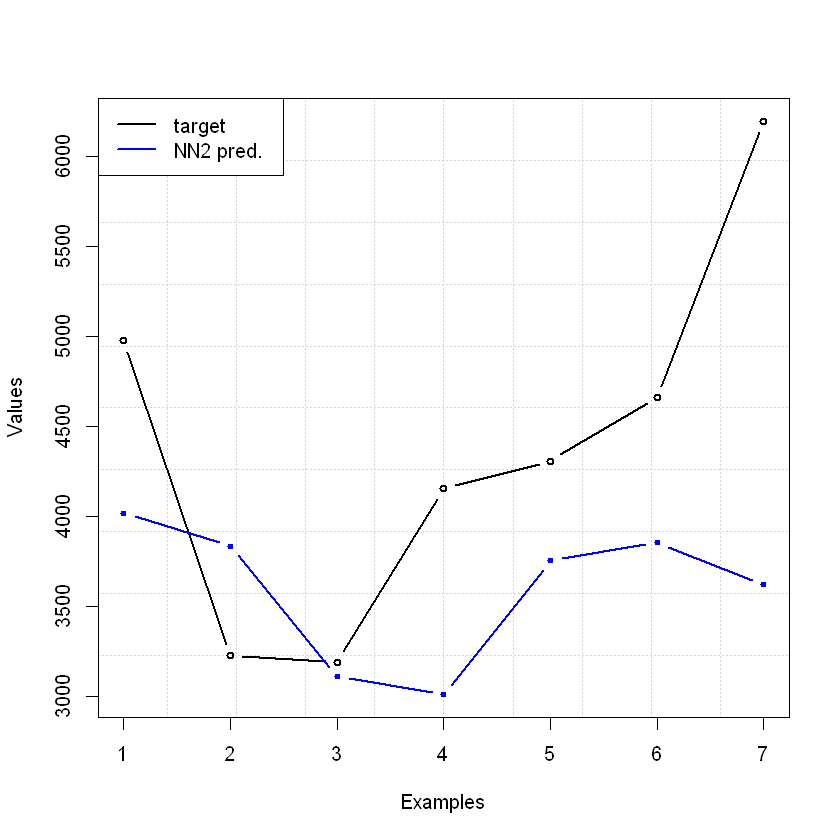

In [526]:
# neural network modeling, via rminer:
d=CasesSeries(TS,c(1:7)) # data.frame from time series (domain knowledge for the 1,12,13 time lag selection)
print(summary(d))
LD=nrow(d) # note: LD < L
hd=holdout(d$y,ratio=NTS,mode="order")
NN2=fit(y~.,d[hd$tr,],model="mlpe")
init=hd$ts[1] # or same as: init=LD-H+1
F5=lforecast(NN2,d,start=hd$ts[1],horizon=H)
print(F5)
Pred5=F5
mgraph(Y,Pred5,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","NN2 pred.")))


mae = mmetric(Y,Pred5,metric="MAE")
nmae = mmetric(Y,Pred5,metric="NMAE")

# Metricas
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "MLPE_TSF_rminer"
resdf[nomeModelo] = c(mae,nmae)
resdf

### TSF Random Forest RMiner

[1] 3692.319 3147.268 2957.921 3178.845 3482.247 3573.180 3587.100
MAE: 1012.446 
NMAE: 33.7257 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples,MLPE_CasesSeries,MLPE_GW,HW_GW,Arima_GW,NN_GW,RandomForest_GW,MLPE_RW,HW_RW,Arima_RW,NN_RW,RandomForest_RW,MLPE_TSF_rminer,RF_TSF_rminer
MAE,1080.96,1568.75,1149.16,950.60,803.67364,835.67010,479.448223,749.38064,699.46488,657.1372,718.7323,527.033846,648.42601,950.89709,657.1372,959.5233,1012.4455
NMAE,36.01,52.26,38.28,31.67,26.77127,14.36353,8.240774,12.88038,12.02243,11.2949,12.3536,9.058677,11.14517,16.34405,11.2949,31.9628,33.7257


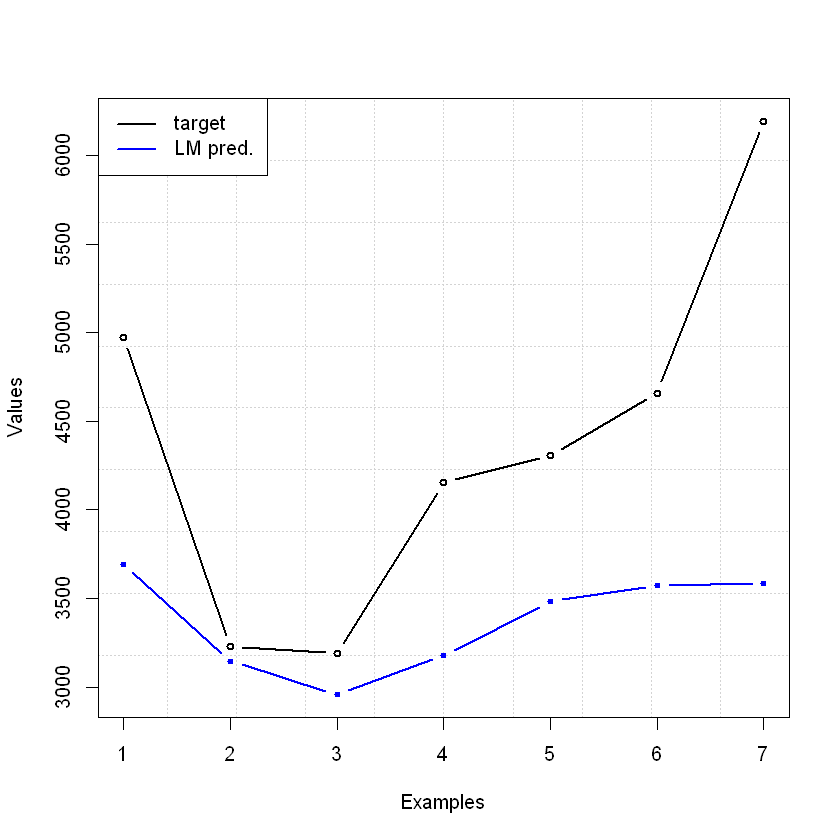

In [527]:
# random forest modeling, via rminer:
LM=fit(y~.,d[hd$tr,],model="lm")
init=hd$ts[1] # or same as: init=LD-H+1
F6=lforecast(LM,d,start=hd$ts[1],horizon=H)
print(F6)
Pred6=F6
mgraph(Y,Pred6,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","LM pred.")))

mae = mmetric(Y,Pred6,metric="MAE")
nmae = mmetric(Y,Pred6,metric="NMAE")

# Metricas
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "RF_TSF_rminer"
resdf[nomeModelo] = c(mae,nmae)
resdf

### TSF HoltWinters Forecast

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = TR)

Smoothing parameters:
 alpha: 0.2963465
 beta : 0.006538548
 gamma: 0.2608523

Coefficients:
          [,1]
a  2903.871417
b    -9.134399
s1 1609.129645
s2 -246.558839
s3 -487.647948
s4 -299.371642
s5  -56.439250
s6  263.545265
s7 1544.586706
[1] "show holt winters forecasts:"
         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
36.71429       4503.867 3547.800 5459.934 3041.6882 5966.045
36.85714       2639.044 1641.351 3636.737 1113.2037 4164.884
37.00000       2388.820 1350.659 3426.982  801.0894 3976.551
37.14286       2567.962 1490.357 3645.568  919.9068 4216.018
37.28571       2801.760 1685.623 3917.897 1094.7760 4508.744
37.42857       3112.610 1958.760 4266.461 1347.9485 4877.272
37.57143       4384.517 3193.691 5575.343 2563.3059 6205.729


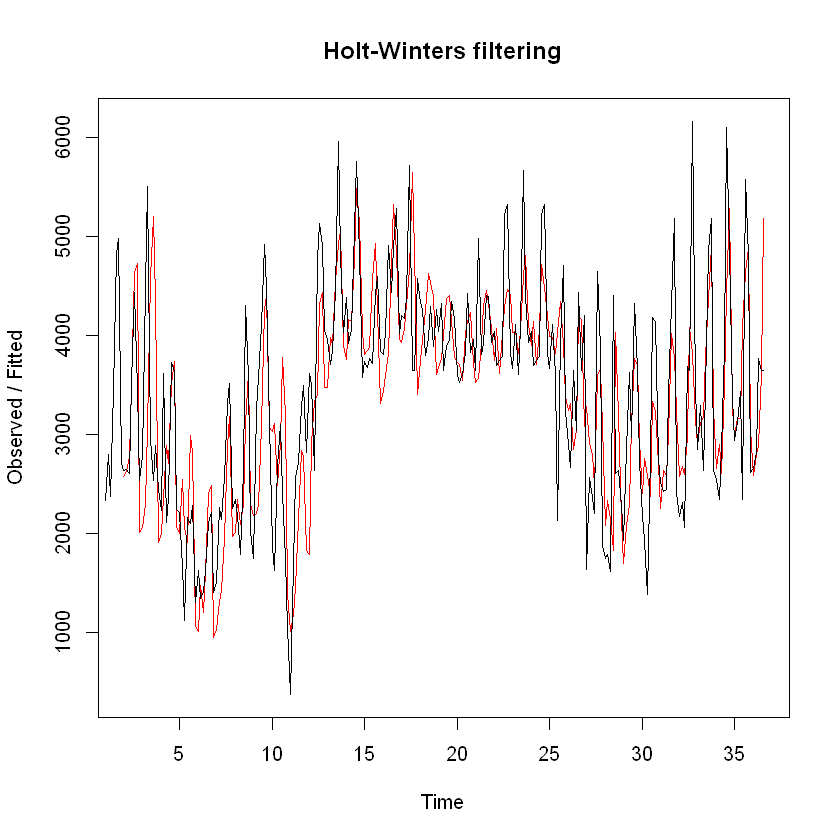

MAE: 1186.774 
NMAE: 39.53278 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples,MLPE_CasesSeries,MLPE_GW,HW_GW,Arima_GW,NN_GW,RandomForest_GW,MLPE_RW,HW_RW,Arima_RW,NN_RW,RandomForest_RW,MLPE_TSF_rminer,RF_TSF_rminer,HW_TSF_forecast
MAE,1080.96,1568.75,1149.16,950.60,803.67364,835.67010,479.448223,749.38064,699.46488,657.1372,718.7323,527.033846,648.42601,950.89709,657.1372,959.5233,1012.4455,1186.77419
NMAE,36.01,52.26,38.28,31.67,26.77127,14.36353,8.240774,12.88038,12.02243,11.2949,12.3536,9.058677,11.14517,16.34405,11.2949,31.9628,33.7257,39.53278


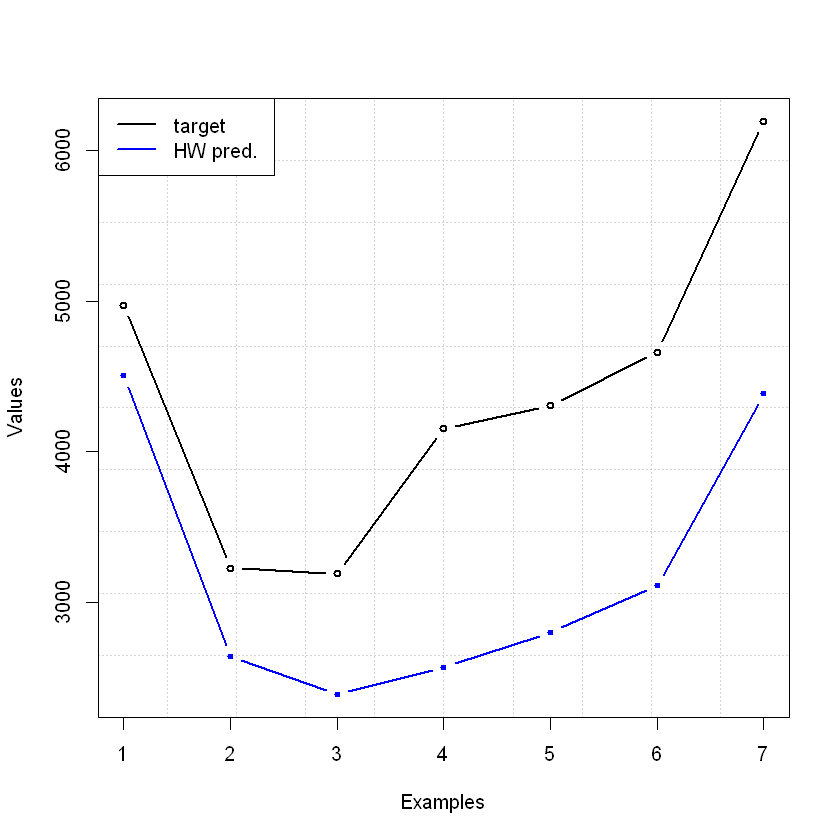

In [528]:
HW=suppressWarnings(HoltWinters(TR))
print(HW)
plot(HW)
print("show holt winters forecasts:")
# forecasts, from 1 to H ahead:
F=forecast(HW,h=7)
print(F)
Pred=F$mean[1:H] # HolWinters format
mgraph(Y,Pred,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","HW pred.")))


mae = mmetric(Y,Pred,metric="MAE")
nmae = mmetric(Y,Pred,metric="NMAE")

# Metricas
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "HW_TSF_forecast"
resdf[nomeModelo] = c(mae,nmae)
resdf

### TSF Arima Forecast

Series: TR 
ARIMA(1,1,2)(0,0,2)[7] 

Coefficients:
         ar1      ma1      ma2    sma1    sma2
      0.1594  -0.6302  -0.2599  0.3143  0.2046
s.e.  0.1832   0.1819   0.1451  0.0672  0.0601

sigma^2 estimated as 598409:  log likelihood=-2007.85
AIC=4027.7   AICc=4028.05   BIC=4048.81
[1] "show ARIMA forecasts:"
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
36.71429       3562.968 2571.599 4554.337 2046.800 5079.135
36.85714       3173.536 2051.916 4295.157 1458.166 4888.907
37.00000       3185.793 2047.767 4323.818 1445.333 4926.253
37.14286       3288.931 2142.375 4435.488 1535.424 5042.439
37.28571       3563.785 2409.750 4717.821 1798.840 5328.730
37.42857       3336.623 2175.308 4497.938 1560.545 5112.701
37.57143       3467.460 2298.934 4635.985 1680.354 5254.566
MAE: 1018.129 
NMAE: 33.91503 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples,MLPE_CasesSeries,MLPE_GW,HW_GW,Arima_GW,NN_GW,RandomForest_GW,MLPE_RW,HW_RW,Arima_RW,NN_RW,RandomForest_RW,MLPE_TSF_rminer,RF_TSF_rminer,HW_TSF_forecast,Arima_TSF_forecast
MAE,1080.96,1568.75,1149.16,950.60,803.67364,835.67010,479.448223,749.38064,699.46488,657.1372,718.7323,527.033846,648.42601,950.89709,657.1372,959.5233,1012.4455,1186.77419,1018.12909
NMAE,36.01,52.26,38.28,31.67,26.77127,14.36353,8.240774,12.88038,12.02243,11.2949,12.3536,9.058677,11.14517,16.34405,11.2949,31.9628,33.7257,39.53278,33.91503


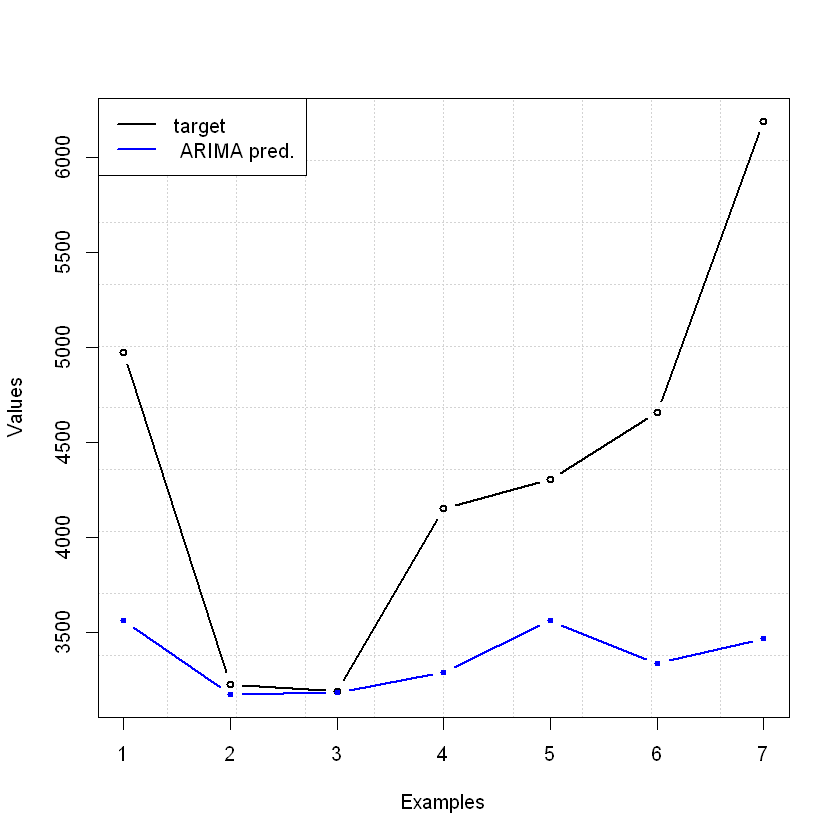

In [529]:
AR=auto.arima(TR)
print(AR) # ARIMA(3,0,1)(2,1,0)[12] 
print("show ARIMA forecasts:")
# forecasts, from 1 to H ahead:
F1=forecast(AR,h=H)
print(F1)
Pred1=F1$mean[1:H]
mgraph(Y,Pred1,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target"," ARIMA pred.")))

mae = mmetric(Y,Pred1,metric="MAE")
nmae = mmetric(Y,Pred1,metric="NMAE")

# Metricas
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "Arima_TSF_forecast"
resdf[nomeModelo] = c(mae,nmae)
resdf

### TSF Neural Network Forecast

Series: TR 
Model:  NNAR(16,1,8)[7] 
Call:   nnetar(y = TR, P = 1, repeats = 3)

Average of 3 networks, each of which is
a 16-8-1 network with 145 weights
options were - linear output units 

sigma^2 estimated as 43394
MAE: 1760.038 
NMAE: 58.62884 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples,MLPE_CasesSeries,MLPE_GW,HW_GW,Arima_GW,NN_GW,...,MLPE_RW,HW_RW,Arima_RW,NN_RW,RandomForest_RW,MLPE_TSF_rminer,RF_TSF_rminer,HW_TSF_forecast,Arima_TSF_forecast,NN_TSF_forecast
MAE,1080.96,1568.75,1149.16,950.60,803.67364,835.67010,479.448223,749.38064,699.46488,...,718.7323,527.033846,648.42601,950.89709,657.1372,959.5233,1012.4455,1186.77419,1018.12909,1760.03773
NMAE,36.01,52.26,38.28,31.67,26.77127,14.36353,8.240774,12.88038,12.02243,...,12.3536,9.058677,11.14517,16.34405,11.2949,31.9628,33.7257,39.53278,33.91503,58.62884


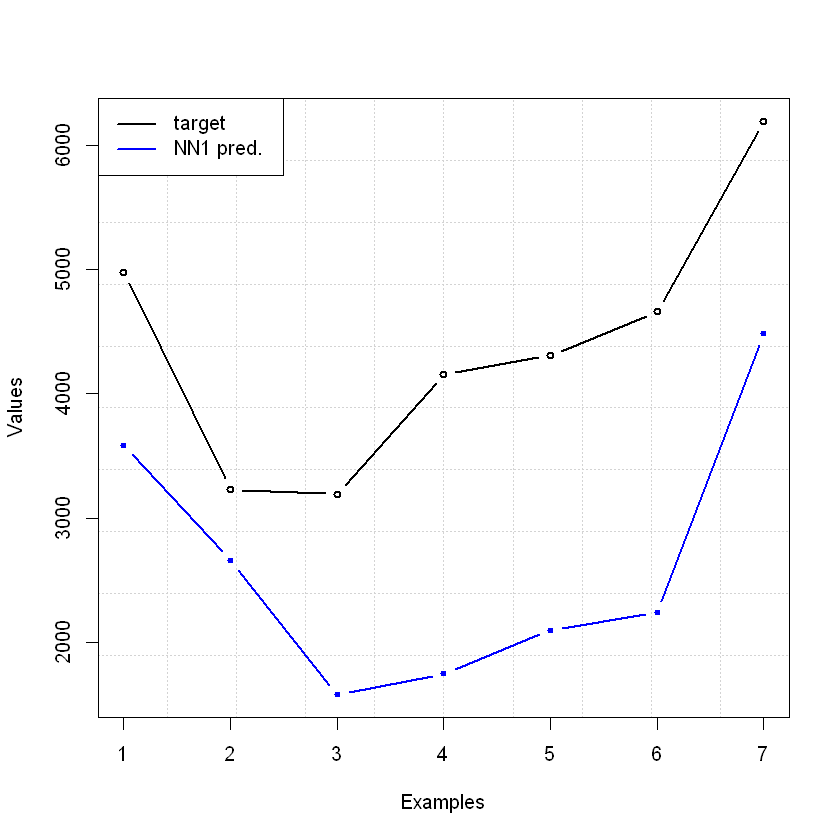

In [530]:
NN1=nnetar(TR,P=1,repeats=3)
print(NN1)
F3=forecast(NN1,h=H)
Pred3=F3$mean[1:H] # HolWinters format
mgraph(Y,Pred3,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","NN1 pred.")))

mae = mmetric(Y,Pred3,metric="MAE")
nmae = mmetric(Y,Pred3,metric="NMAE")

# Metricas
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "NN_TSF_forecast"
resdf[nomeModelo] = c(mae,nmae)
resdf

### TSF ETS Forecast

Series: TR 
Model:  NNAR(16,1,8)[7] 
Call:   nnetar(y = TR, P = 1, repeats = 3)

Average of 3 networks, each of which is
a 16-8-1 network with 145 weights
options were - linear output units 

sigma^2 estimated as 30199
MAE: 1249.271 
NMAE: 41.61462 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples,MLPE_CasesSeries,MLPE_GW,HW_GW,Arima_GW,NN_GW,...,HW_RW,Arima_RW,NN_RW,RandomForest_RW,MLPE_TSF_rminer,RF_TSF_rminer,HW_TSF_forecast,Arima_TSF_forecast,NN_TSF_forecast,ETS_TSF_forecast
MAE,1080.96,1568.75,1149.16,950.60,803.67364,835.67010,479.448223,749.38064,699.46488,...,527.033846,648.42601,950.89709,657.1372,959.5233,1012.4455,1186.77419,1018.12909,1760.03773,1249.27077
NMAE,36.01,52.26,38.28,31.67,26.77127,14.36353,8.240774,12.88038,12.02243,...,9.058677,11.14517,16.34405,11.2949,31.9628,33.7257,39.53278,33.91503,58.62884,41.61462


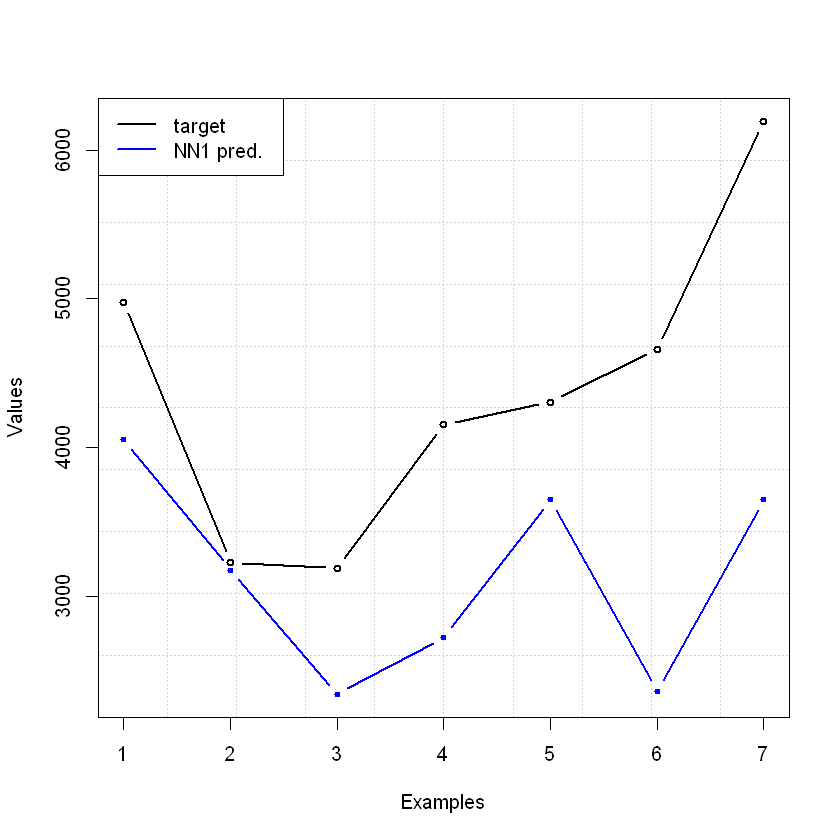

In [531]:
NN1=nnetar(TR,P=1,repeats=3)
print(NN1)
F3=forecast(NN1,h=H)
Pred3=F3$mean[1:H] # HolWinters format
mgraph(Y,Pred3,graph="REG",Grid=10,col=c("black","blue"),leg=list(pos="topleft",leg=c("target","NN1 pred.")))

mae = mmetric(Y,Pred3,metric="MAE")
nmae = mmetric(Y,Pred3,metric="NMAE")

# Metricas
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "ETS_TSF_forecast"
resdf[nomeModelo] = c(mae,nmae)
resdf

### TSF MLPE RMiner

SMAPE:  16.62 
MAE: 711.81 
NMAE: 23.71 


ERROR: Error in resdf[nomeModelo] = c(mae, nmae): object 'resdf' not found


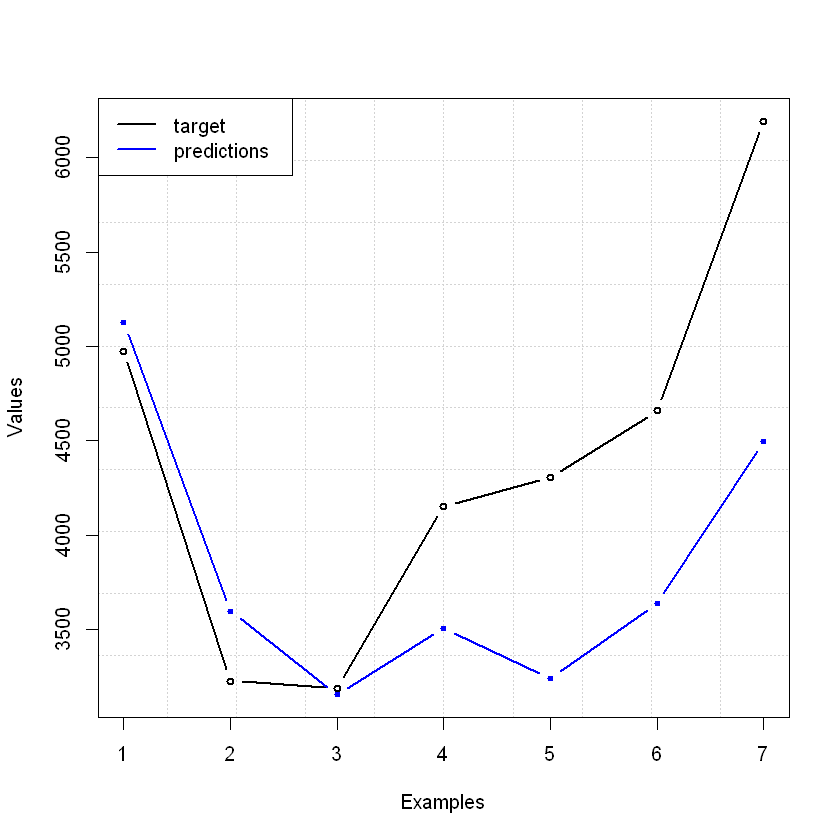

In [18]:
d1 = data[,1] #coluna all
L = length(d1)
K=7

timelags = c(1:7)
D = CasesSeries(d1,timelags)

H=holdout(data$all,ratio=7,mode="order")
M=fit(y~.,D[H$tr,],model="mlpe") # create forecasting model
Pred=lforecast(M,D,start=(length(H$tr)+1),7)

Target = d1[H$ts]

mae = round(mmetric(Target,Pred,metric="MAE"),2)
nmae = round(mmetric(Target,Pred,metric="NMAE"),2)
cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")

# last iteration predictions:
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")))



# Metricas
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "MLPE_TSF_rminer"
resdf[nomeModelo] = c(mae,nmae)
resdf

In [2]:

    d1 = data[,1] #coluna all
    L = length(d1)
    K=7
    Test = K
    
    timelags = c(1:7)
    D = CasesSeries(d1,timelags)
    
    # Holdout based on selected week
    allIndex = c(1:257)
    semanaEsc = c(36:42) #101-107
    tr = allIndex[-semanaEsc]
    ts = semanaEsc
    
    M = fit(y~.,D[tr,],model="randomForest")
    Pred = lforecast(M,D,start=ts[1],Test)
    print(Pred)

ERROR: Error in data[, 1]: object of type 'closure' is not subsettable


## Time Series Forecast (Window Training)

In [7]:
# Create Dataframe for Result Storage
resdf <- data.frame(matrix(ncol = 4, nrow = 0))
# Name the Columns
colnames(resdf) <- c('window','model','mae','nmae')

d1 = data[,1] # coluna all
L = length(d1) # 257
K=7
Test=K # H, the number of multi-ahead steps, adjust if needed
S=K # step jump: set in this case to 7 predictions
Runs=10 # number of growing window iterations, adjust if needed (49 dias)

# forecast:
W=(L-Test)-(Runs-1)*S # initial training window size for the ts space (forecast methods)

# rminer:
timelags=c(1:7) # 1 previous day until 7 previous days
D=CasesSeries(d1,timelags) # note: nrow(D) is smaller by max timelags than length(d1)
W2=W-max(timelags) # initial training window size for the D space (CasesSeries, rminer methods)

YR=diff(range(d1)) # global Y range, use the same range for the NMAE calculation in all iterations

ev=vector(length=Runs) # error vector for "mlpe"
evn=vector(length=Runs) # error vector for "mlpe"

# growing window demo, rolling window can also be used:

# code for 1 iteration:
b=1

#rminer
models <- c("lm","mlpe","naive","ctree","mlp","randomForest","mr","rvm","ksvm")

### Growing/Rolling Window (Rminer)

In [11]:
window = "rolling" # Growing Window = "incremental" / Rolling Window = "rolling"
#window = "incremental" # Growing Window = "incremental" / Rolling Window = "rolling"

for (u in 1:length(models)) {
    for (b in 1:Runs) {
    H = holdout(D$y, ratio=Test, mode=window, iter=b, window=W2,increment=S)
    M = fit(y~.,D[H$tr,],model=models[u])
    Pred = lforecast(M,D,start=(length(H$tr)+1),Test)
    ev[b]=mmetric(y=D[H$ts,]$y,x=Pred,metric="MAE",val=YR)
    evn[b]=mmetric(y=D[H$ts,]$y,x=Pred,metric="NMAE",val=YR)
    }
    cat("mlpe median MAE(",models[u],"):",mean(ev),"\n")
    cat("mlpe median NMAE(",models[u],"):",mean(evn),"\n")
    # Save Results to the res Dataframe
    mae=mean(ev)
    nmae=mean(evn)
    resdf[nrow(resdf) + 1,] = c(window,models[u],mae,nmae) 
}

mlpe median MAE( lm ): 377.5555 
mlpe median NMAE( lm ): 13.57625 
mlpe median MAE( mlpe ): 398.8739 
mlpe median NMAE( mlpe ): 14.34282 
mlpe median MAE( naive ): 459.1394 
mlpe median NMAE( naive ): 16.50987 
mlpe median MAE( ctree ): 412.531 
mlpe median NMAE( ctree ): 14.83391 
mlpe median MAE( mlp ): 417.9145 
mlpe median NMAE( mlp ): 15.02749 
mlpe median MAE( randomForest ): 375.927 
mlpe median NMAE( randomForest ): 13.51769 
mlpe median MAE( mr ): 377.5555 
mlpe median NMAE( mr ): 13.57625 
mlpe median MAE( rvm ): 454.5846 
mlpe median NMAE( rvm ): 16.34609 
mlpe median MAE( ksvm ): 402.7179 
mlpe median NMAE( ksvm ): 14.48105 


### Growing/Rolling Window (Forecast)

In [12]:
# Reinitialize the metric vectors
ev=vector(length=Runs) # error vector for "mlpe"
evn=vector(length=Runs) # error vector for "mlpe"

univarModels = c("HW","Arima","NN","ETS")
for (u in 1:length(univarModels)){
    for (b in 1:Runs) {
    # Holdout with window
    H = holdout(d1, ratio=Test, mode=window, iter=b, window=W,increment=S)
    # Time Series
    dtr = ts(d1[H$tr],frequency=K)

    univarModel = univarModels[u]
        
    switch(  
    univarModel,  
    "HW"= {M = suppressWarnings(HoltWinters(dtr))},
    "Arima"= {M = suppressWarnings(auto.arima(dtr))},
    "NN"= {M = suppressWarnings(nnetar(dtr,p=7))},
    "ETS"= {M = suppressWarnings(ets(dtr))},
    )  

    # Predicting 7 test values
    Pred = forecast(M,h=length(H$ts))$mean[1:Test]

    ev[b]=mmetric(y=d1[H$ts],x=Pred,metric="MAE",val=YR)
    evn[b]=mmetric(y=d1[H$ts],x=Pred,metric="NMAE",val=YR)
    }
    mae=round(mean(ev),digits=2)
    nmae=round(mean(evn),digits=2)
    cat("\n Mean MAE(",univarModel,") :",mae,"\n")    
    cat(" Mean NMAE(",univarModel,") :",nmae,"\n")

    # Save Results to the res Dataframe
    resdf[nrow(resdf) + 1,] = c(window,univarModel,mae,nmae)  
}


 Mean MAE( HW ) : 339.88 
 Mean NMAE( HW ) : 12.22 

 Mean MAE( Arima ) : 350.41 
 Mean NMAE( Arima ) : 12.6 

 Mean MAE( NN ) : 329.08 
 Mean NMAE( NN ) : 11.83 

 Mean MAE( ETS ) : 336.19 
 Mean NMAE( ETS ) : 12.09 


In [13]:
nrow(resdf)

[1] 26

In [16]:
# Lowest MAE Value in Hibrid Modeling
lowestmae = min(as.numeric(resdf[,3]))
cat("Melhor Valor para MAE: ", lowestmae)
# Encontrar as linhas que possuem o menor valor para MAE
resdf[resdf$mae %in%lowestmae,]

# Lowest NMAE Value in Hibrid Modeling
lowestnmae = min(as.numeric(resdf[,4]))
cat("Melhor Valor para NMAE: ", lowestnmae)
# Encontrar as linhas que possuem o menor valor para NMAE
resdf[resdf$nmae %in% lowestnmae,]


# Save the Results
saveResults('2',"u",'4')

Melhor Valor para MAE:  329.08

,window,model,mae,nmae
25,rolling,NN,329.08,11.83


Melhor Valor para NMAE:  11.83

,window,model,mae,nmae
25,rolling,NN,329.08,11.83


CSV saved in ./resultados/Cenario 2/Modelos Univariados/TS4.csv

## Modelo Hibrido

In [537]:
#Data Prep
d1 = data[,1] #coluna all
L = length(d1)
K=7

timelags = c(1:7)
D = CasesSeries(d1,timelags)

### Modelo Univariado

In [538]:
# Data Seperation
H=holdout(data$all,ratio=7,mode="order")
# Model Training
M=fit(y~.,D[H$tr,],model="mlpe") # create forecasting model
# Forecast
Pred=lforecast(M,D,start=(length(H$tr)+1),7)


SMAPE:  13.18 
MAE:  559.98 
NMAE:  18.65 


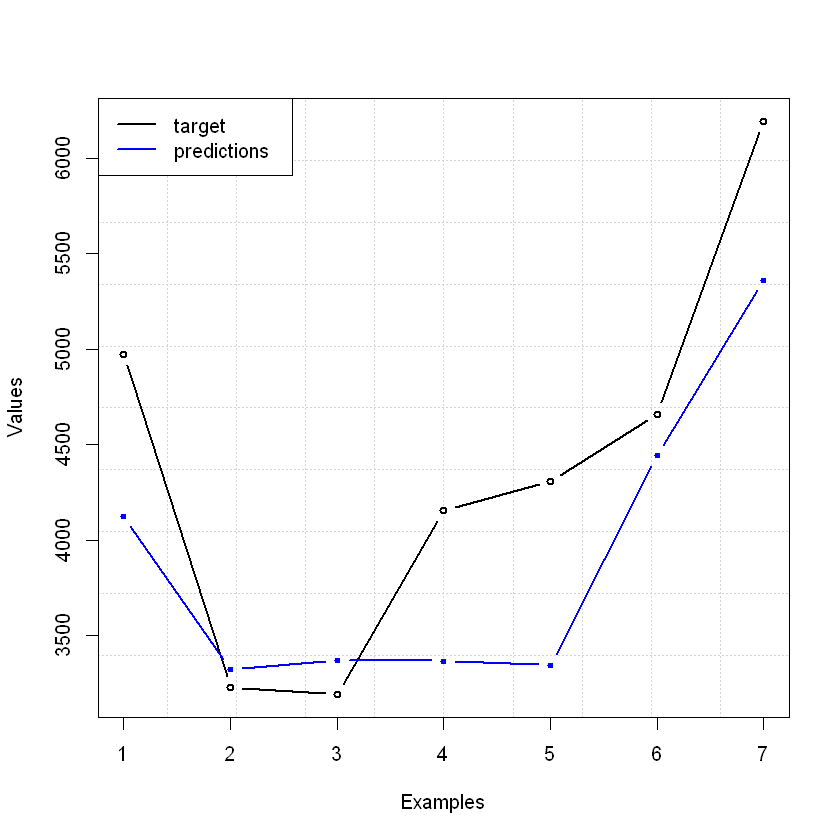

In [539]:
# Metrics
Target = d1[H$ts]

cat("SMAPE: ",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
cat("MAE: ",round(mmetric(Target,Pred,metric="MAE"),2),"\n")
cat("NMAE: ",round(mmetric(Target,Pred,metric="NMAE"),2),"\n")

# last iteration predictions:
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")))

In [540]:
# Previsoes para Dados de Treino com o modelo univariado
mfit=predict(M,D[H$tr,])
df1 = data.frame(mfit)
colnames(df1) <- "pred"
df2 = data.frame(Pred)
# Concatenação dos valores previstos de teste e valores previstos de treino
colnames(df2) <- "pred"
df3 = rbind(df1,df2)

nrow(df1)
nrow(df2)
nrow(df3)

[1] 250

[1] 7

[1] 257

In [541]:
bind = data.frame(cbind(data,df3))
head(bind)

all,weather,maxtemp,RH,maxwind,pred
2332,0,13,87,0,2809.970
2801,0,14,94,45,2883.376
2375,0,14,82,55,3081.296
3447,1,13,78,0,3612.664
4823,0,16,81,37,4522.962
4978,0,16,73,0,4059.770


Target Values: 4974 3228 3191 4153 4307 4660 6193 
Predictions: 3867.294 2994.094 3023.785 3351.093 2697.649 5006.931 6009.645 
MAE: 635.62 
NMAE: 21.17 


METRICA_MODELO,randomForest_simples,MR_Simples,KSVM_simples,MLPE_simples,MLPE_CasesSeries,MLPE_GW,HW_GW,Arima_GW,NN_GW,...,ETS_TSF_forecast,lm_TSF_rminer,mlpe_TSF_rminer,naive_TSF_rminer,ctree_TSF_rminer,mlp_TSF_rminer,randomForest_TSF_rminer,mr_TSF_rminer,rvm_TSF_rminer,Hibrido_simples_rminer_mlpe
MAE,1080.96,1568.75,1149.16,950.60,803.67364,835.67010,479.448223,749.38064,699.46488,...,1249.27077,379.20,675.61,1073.91,550.99,510.38,499.86,379.20,638.62,635.62
NMAE,36.01,52.26,38.28,31.67,26.77127,14.36353,8.240774,12.88038,12.02243,...,41.61462,12.63,22.51,35.77,18.35,17.00,16.65,12.63,21.27,21.17


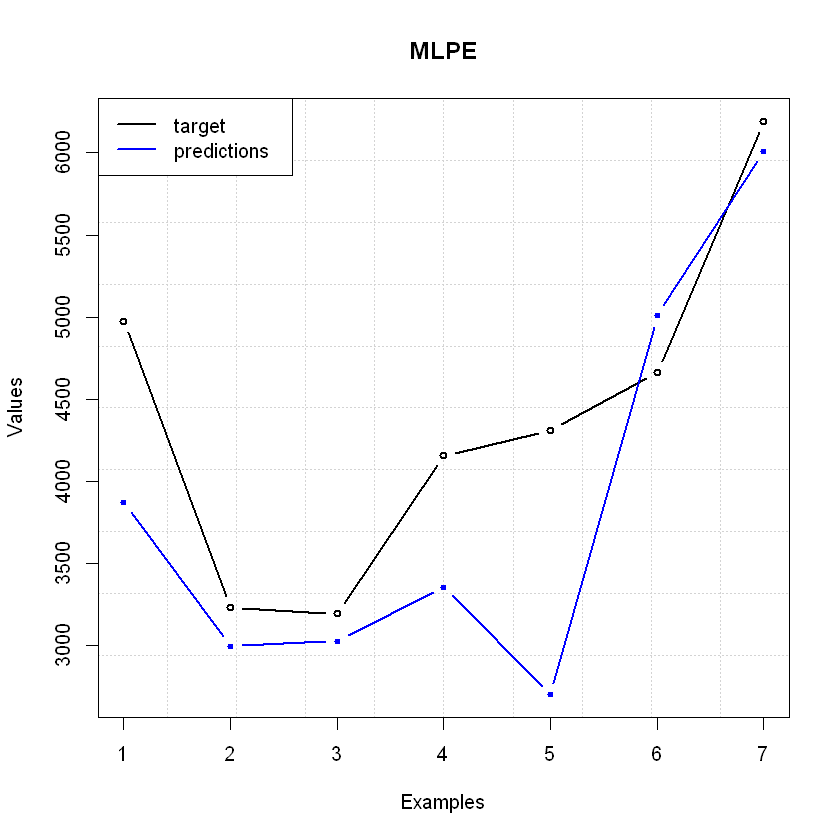

In [542]:
H=holdout(bind$all,ratio=7,mode="order")

# Seleção dos dados de Treino
train = bind[H$tr,]

# Seleção dos dados de Teste
test = bind[H$ts,]

MR=fit(all~.,train,model="mlpe")
cat("Target Values:",Target,"\n")

Pred = predict(MR,test)
cat("Predictions:",Pred,"\n")

mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="MLPE")
mae=round(mmetric(Target,Pred,metric="MAE"),2)
nmae=round(mmetric(Target,Pred,metric="NMAE"),2)
cat("MAE:",mae,"\n")
cat("NMAE:",nmae,"\n")

# Guardar os Resultados
nomeModelo = "Hibrido_simples_rminer_mlpe"
resdf[nomeModelo] = c(mae,nmae)
resdf

In [543]:
# Ciclo for com as varias configuracoes do metodo fit para descobrir quais sao as melhroes

## Modelo Hibrido (Window Training)

In [246]:
# Create Dataframe for Result Storage
resdf <- data.frame(matrix(ncol = 5, nrow = 0))
# Name the Columns
colnames(resdf) <- c('window','uni','multi','mae','nmae')

d1 = data[,1] # coluna all
L = length(d1) # 257
K=7
Test=K # H, the number of multi-ahead steps, adjust if needed
S=K # step jump: set in this case to 7 predictions
Runs=10 # number of growing window iterations, adjust if needed (49 dias)

# forecast:
W=(L-Test)-(Runs-1)*S # initial training window size for the ts space (forecast methods)

# rminer:
timelags=c(1:7) # 1 previous day until 7 previous days
D=CasesSeries(d1,timelags) # note: nrow(D) is smaller by max timelags than length(d1)
W2=W-max(timelags) # initial training window size for the D space (CasesSeries, rminer methods)

YR=diff(range(d1)) # global Y range, use the same range for the NMAE calculation in all iterations

ev=vector(length=Runs) # error vector for "mlpe"
evn=vector(length=Runs) # error vector for "mlpe"

# growing window demo, rolling window can also be used:

# code for 1 iteration:
b=1

#rminer
models <- c("lm","mlpe","naive","ctree","mlp","randomForest","mr","rvm","ksvm")

### Growing/Rolling Window (Rminer + Rminer)

In [251]:
window = "rolling" # Growing Window = "incremental" / Rolling Window = "rolling"
#window = "incremental" # Growing Window = "incremental" / Rolling Window = "rolling"
for (uni in 1:length(models)){
    for (multi in 1:length(models)){
        for (b in 1:Runs) {
            H = holdout(D$y, ratio=Test, mode=window, iter=b, window=W2,increment=S)
            M = fit(y~.,D[H$tr,],model=models[uni])
            Pred = lforecast(M,D,start=(length(H$tr)+1),Test)
            PrevPred = predict(M,D[H$tr,])

            TRSIZE=length(PrevPred)
            LPRED=length(Pred)
            RSIZE=TRSIZE+LPRED
            # Juntar as previsoes de treino e teste do Modelo Univariado
            mlpecolumn=c(PrevPred,Pred)

            # Juntar as colunas das previsões do Modelo Univariado com as target e as variaveis ambientais
            HD=cbind(mlpe=mlpecolumn,y=D$y[1:RSIZE],data[1:RSIZE,2:5])
            HD=data.frame(HD)

            M2=fit(y~.,HD[1:TRSIZE,],model=models[multi]) # create forecasting model
            Pred2=predict(M2,HD[(TRSIZE+1):(RSIZE),]) # multi-step ahead forecasts
            ev[b]=mmetric(y=D[H$ts,]$y,x=Pred2,metric="MAE",val=YR)
            evn[b]=mmetric(y=D[H$ts,]$y,x=Pred2,metric="NMAE",val=YR)
        }
        # Print Results
        mae = round(mean(ev),digits=2)
        nmae = round(mean(evn),digits=2)
        cat("\n Mean MAE(",models[uni],"+",models[multi],") :",mae,"\n")    
        cat(" Mean NMAE(",models[uni],"+",models[multi],") :",nmae,"\n")
        cat("--------------------------------------------------------------------------")
        
        # Save Results to the res Dataframe
        resdf[nrow(resdf) + 1,] = c(window,models[uni],models[multi],mae,nmae)        
    }
}


 Mean MAE( lm + lm ) : 645.75 
 Mean NMAE( lm + lm ) : 8.02 
--------------------------------------------------------------------------
 Mean MAE( lm + mlpe ) : 731.84 
 Mean NMAE( lm + mlpe ) : 9.08 
--------------------------------------------------------------------------
 Mean MAE( lm + naive ) : 578.51 
 Mean NMAE( lm + naive ) : 7.18 
--------------------------------------------------------------------------
 Mean MAE( lm + ctree ) : 785.35 
 Mean NMAE( lm + ctree ) : 9.75 
--------------------------------------------------------------------------
 Mean MAE( lm + mlp ) : 775.41 
 Mean NMAE( lm + mlp ) : 9.63 
--------------------------------------------------------------------------
 Mean MAE( lm + randomForest ) : 708.76 
 Mean NMAE( lm + randomForest ) : 8.8 
--------------------------------------------------------------------------
 Mean MAE( lm + mr ) : 645.75 
 Mean NMAE( lm + mr ) : 8.02 
--------------------------------------------------------------------------
 Mean MAE(

Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object@object, newdata):
"prediction from a rank-deficient fit may be misleading"W


 Mean MAE( naive + lm ) : 613.83 
 Mean NMAE( naive + lm ) : 7.62 
--------------------------------------------------------------------------
 Mean MAE( naive + mlpe ) : 578.51 
 Mean NMAE( naive + mlpe ) : 7.18 
--------------------------------------------------------------------------
 Mean MAE( naive + naive ) : 578.51 
 Mean NMAE( naive + naive ) : 7.18 
--------------------------------------------------------------------------
 Mean MAE( naive + ctree ) : 763.46 
 Mean NMAE( naive + ctree ) : 9.48 
--------------------------------------------------------------------------
 Mean MAE( naive + mlp ) : 578.51 
 Mean NMAE( naive + mlp ) : 7.18 
--------------------------------------------------------------------------
 Mean MAE( naive + randomForest ) : 647.99 
 Mean NMAE( naive + randomForest ) : 8.04 
--------------------------------------------------------------------------
 Mean MAE( naive + mr ) : 613.83 
 Mean NMAE( naive + mr ) : 7.62 
------------------------------------------

Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."

--------------------------------------------------------------------------
 Mean MAE( naive + ksvm ) : 592.21 
 Mean NMAE( naive + ksvm ) : 7.35 
--------------------------------------------------------------------------
 Mean MAE( ctree + lm ) : 666.39 
 Mean NMAE( ctree + lm ) : 8.27 
--------------------------------------------------------------------------
 Mean MAE( ctree + mlpe ) : 857.8 
 Mean NMAE( ctree + mlpe ) : 10.65 
--------------------------------------------------------------------------
 Mean MAE( ctree + naive ) : 578.51 
 Mean NMAE( ctree + naive ) : 7.18 
--------------------------------------------------------------------------
 Mean MAE( ctree + ctree ) : 793.67 
 Mean NMAE( ctree + ctree ) : 9.85 
--------------------------------------------------------------------------
 Mean MAE( ctree + mlp ) : 903.09 
 Mean NMAE( ctree + mlp ) : 11.21 
--------------------------------------------------------------------------
 Mean MAE( ctree + randomForest ) : 732.78 
 Mean 

In [252]:
nrow(resdf)

[1] 198

### Growing/Rolling Window (Forecast + Rminer)

In [253]:
# Reinitialize the metric vectors
ev=vector(length=Runs) # error vector for "mlpe"
evn=vector(length=Runs) # error vector for "mlpe"

univarModels = c("HW","Arima","NN","ETS")
for (u in 1:length(univarModels)){
    for (m in 1:length(models)){
        for (b in 1:Runs) {
        # Holdout with window
        H = holdout(d1, ratio=Test, mode=window, iter=b, window=W,increment=S)
        # Time Series
        dtr = ts(d1[H$tr],frequency=K)

        univarModel = univarModels[u]
            
        switch(  
        univarModel,  
        "HW"= {M = suppressWarnings(HoltWinters(dtr)); PrevPred = M$fitted[1:nrow(M$fitted)]},
        "Arima"= {M = suppressWarnings(auto.arima(dtr)); PrevPred = fitted(M)},
        "NN"= {M = suppressWarnings(nnetar(dtr,p=7)); PrevPred = M$fitted[8:length(M$fitted)]},
        "ETS"= {M = suppressWarnings(ets(dtr)); PrevPred = fitted(M)},
        )  

        # Predicting 7 test values
        Pred = forecast(M,h=length(H$ts))$mean[1:Test]

        # Creating a Dataframe with all univariate predictions
        uniPred = c(PrevPred,Pred)
        HD = cbind(uniPred=uniPred,data[1:length(uniPred),2:6],y=d1[1:length(uniPred)])
        HD = data.frame(HD)

        TRSIZE=length(PrevPred)
        LPRED=length(Pred)
        RSIZE=TRSIZE+LPRED

        # Creating Multivariate Model with new Dataframe
        M2=fit(y~.,HD[1:TRSIZE,],model=models[m]) # create forecasting model
        Pred2=predict(M2,HD[(TRSIZE+1):(RSIZE),]) # multi-step ahead forecasts
        ev[b]=mmetric(y=d1[H$ts],x=Pred2,metric="MAE",val=YR)
        evn[b]=mmetric(y=d1[H$ts],x=Pred2,metric="NMAE",val=YR)
        }
        mae=round(mean(ev),digits=2)
        nmae=round(mean(evn),digits=2)
        cat("\n Mean MAE(",univarModel," + ",models[m],") :",mae,"\n")    
        cat(" Mean NMAE(",univarModel," + ",models[m],") :",nmae,"\n")
        
        # Save Results to the res Dataframe
        resdf[nrow(resdf) + 1,] = c(window,univarModel,models[m],mae,nmae)  
    }
}


 Mean MAE( HW  +  lm ) : 545.86 
 Mean NMAE( HW  +  lm ) : 6.78 

 Mean MAE( HW  +  mlpe ) : 650.28 
 Mean NMAE( HW  +  mlpe ) : 8.07 

 Mean MAE( HW  +  naive ) : 567.96 
 Mean NMAE( HW  +  naive ) : 7.05 

 Mean MAE( HW  +  ctree ) : 773.28 
 Mean NMAE( HW  +  ctree ) : 9.6 

 Mean MAE( HW  +  mlp ) : 733.67 
 Mean NMAE( HW  +  mlp ) : 9.11 

 Mean MAE( HW  +  randomForest ) : 711.9 
 Mean NMAE( HW  +  randomForest ) : 8.84 

 Mean MAE( HW  +  mr ) : 545.86 
 Mean NMAE( HW  +  mr ) : 6.78 

 Mean MAE( HW  +  rvm ) : 641.41 
 Mean NMAE( HW  +  rvm ) : 7.96 

 Mean MAE( HW  +  ksvm ) : 596.66 
 Mean NMAE( HW  +  ksvm ) : 7.41 

 Mean MAE( Arima  +  lm ) : 642.27 
 Mean NMAE( Arima  +  lm ) : 7.97 

 Mean MAE( Arima  +  mlpe ) : 680.88 
 Mean NMAE( Arima  +  mlpe ) : 8.45 

 Mean MAE( Arima  +  naive ) : 575.21 
 Mean NMAE( Arima  +  naive ) : 7.14 

 Mean MAE( Arima  +  ctree ) : 716.28 
 Mean NMAE( Arima  +  ctree ) : 8.89 

 Mean MAE( Arima  +  mlp ) : 739.4 
 Mean NMAE( Arima  +  m

In [255]:
# HyperParameter Tuning (GridSearch)
head(resdf)
cat(nrow(resdf))

window,uni,multi,mae,nmae
incremental,lm,lm,531.93,6.6
incremental,lm,mlpe,618.58,7.68
incremental,lm,naive,565.37,7.02
incremental,lm,ctree,517.81,6.43
incremental,lm,mlp,599.74,7.44
incremental,lm,randomForest,548.55,6.81


234

In [256]:
# Lowest MAE Value in Hibrid Modeling
lowestmae = min(as.numeric(resdf[,4]))
cat("Melhor Valor para MAE: ", lowestmae)
# Encontrar as linhas que possuem o menor valor para MAE
resdf[resdf$mae %in%lowestmae,]

# Lowest NMAE Value in Hibrid Modeling
lowestnmae = min(as.numeric(resdf[,5]))
cat("Melhor Valor para NMAE: ", lowestnmae)
# Encontrar as linhas que possuem o menor valor para NMAE
resdf[resdf$nmae %in% lowestnmae,]


# Save the Results
saveResults('3',"h",'5')

Melhor Valor para MAE:  418.96

,window,uni,multi,mae,nmae
82,incremental,HW,lm,418.96,5.2
88,incremental,HW,mr,418.96,5.2


Melhor Valor para NMAE:  5.2

,window,uni,multi,mae,nmae
82,incremental,HW,lm,418.96,5.2
88,incremental,HW,mr,418.96,5.2


CSV saved in ./resultados/Cenario 3/Modelos Hibridos/TS5.csv

In [15]:
# (Function) Export Results to CSV
saveResults <- function(cen,type,ts){
    # Cenario
    switch(  
        cen,  
        '1'= {cenFolder = 'Cenario 1'},
        '2'= {cenFolder = 'Cenario 2'},
        '3'= {cenFolder = 'Cenario 3'},
        ) 
    
    # Tipo de Modelo
     switch(  
        type,  
        'u'= {typeFolder = 'Modelos Univariados'},
        'm'= {typeFolder = 'Modelos Multivariados'},
        'h'= {typeFolder = 'Modelos Hibridos'},
        ) 
    
    # Time Series
     switch(  
        ts,  
        '1'= {file = 'TS1.csv'},
        '2'= {file = 'TS2.csv'},
        '3'= {file = 'TS3.csv'},
        '4'= {file = 'TS4.csv'},
        '5'= {file = 'TS5.csv'},
        ) 
    
    # Guardar os Resultados
    rootFolder = "./resultados"
    
    iter1 = paste(rootFolder,cenFolder,sep="/")
    iter2 = paste(iter1,typeFolder,sep="/")
    path = paste(iter2,file,sep="/")
    write.csv(resdf,path,row.names = FALSE)
    cat("CSV saved in", path)
    
}

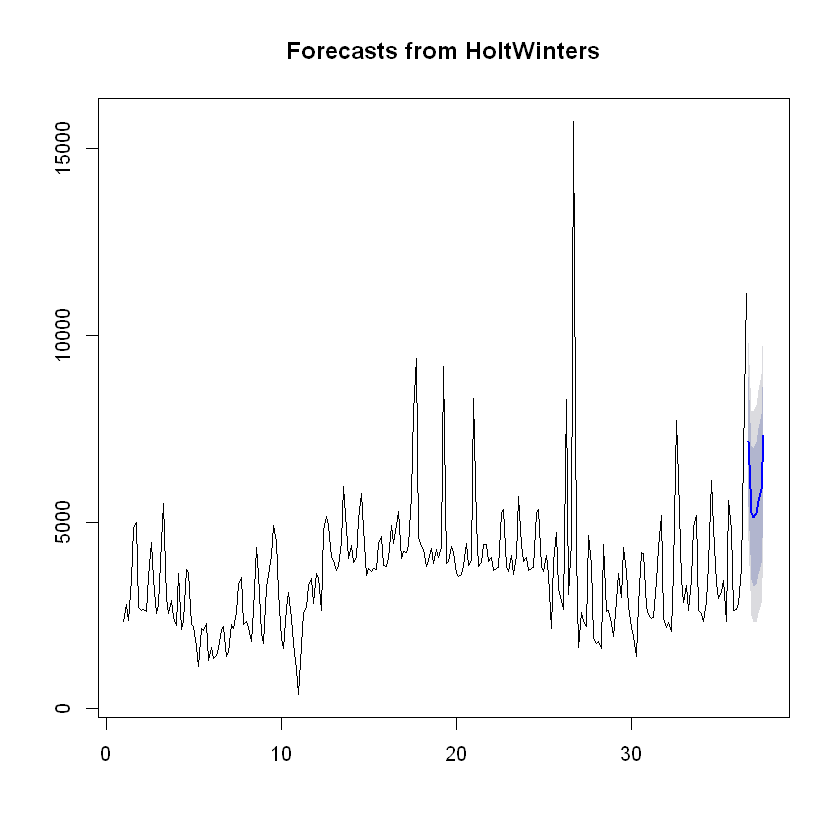

In [187]:
plot(fcast)

In [188]:
d1 = data[,1]
H=holdout(data$all,ratio=7,mode="order")
dtr = ts(d1[H$tr],frequency=7)

M = suppressWarnings(HoltWinters(dtr))
fcast = forecast(M,h=length(H$ts))
preds = fcast$mean[1:7]
Prev = data[H$tr,][,1]

In [189]:
plot(val[H$tr], type = "l", col="red")
lines(val[H$ts], type="l",col="blue")

ERROR: Error in plot(val[H$tr], type = "l", col = "red"): object 'val' not found


In [190]:
val = c(Pred,Prev)

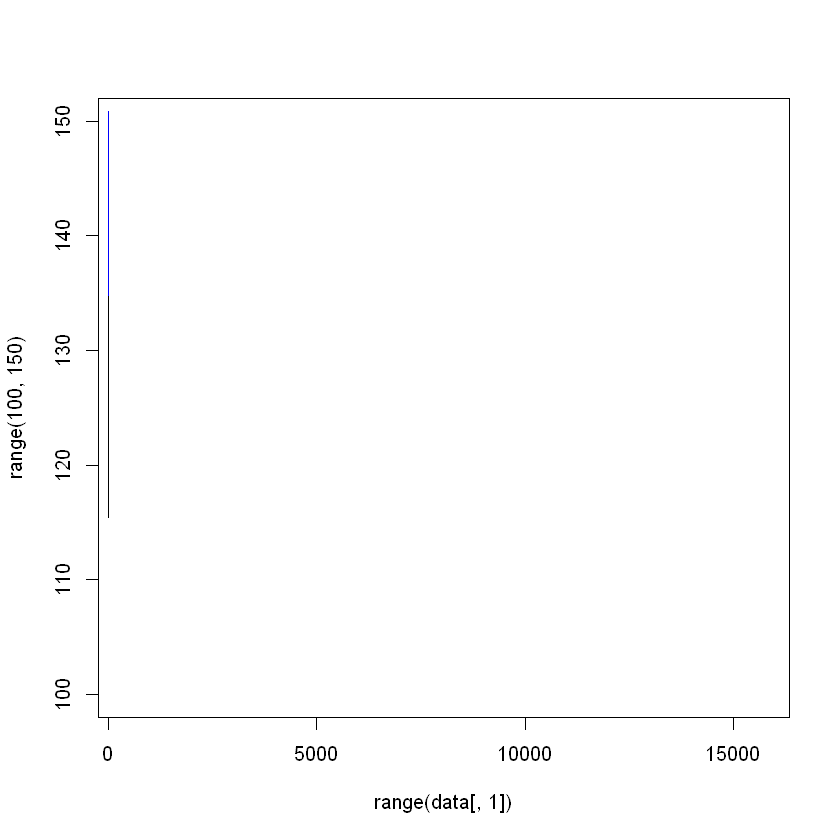

In [191]:
x <- data.frame(Debt = c(115.413 , 116.522 , 123.361, 129.021, 131.786, 131.557, 131.397, 131.355, 132.1, 134.77))
future <- data.frame(Debt=c(144.9, 147.9, 150.9))
df <- data.frame(x=c(1:(nrow(x)+nrow(future))), y= c(x$Debt, future$Debt))

plot(range(data[,1]), range(100,150), type='n')
lines(df[1:nrow(x),1], df[1:nrow(x),2], type='l', col='black')
lines(df[nrow(x):nrow(df),1], df[nrow(x):nrow(df),2], type='l', col='blue')

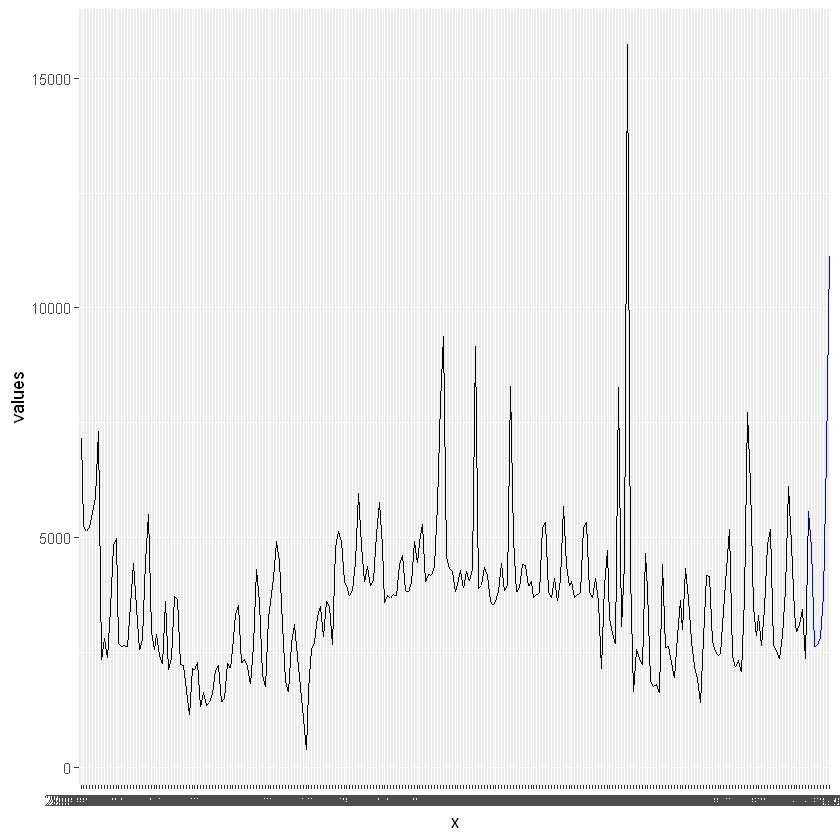

In [94]:
values.highlight <- a$values[250:257]
a$highlight <- ifelse(a$values %in% values.highlight, "blue", "black")

ggplot(a, aes(x = x, y = values, colour = highlight, group = 1)) +
    geom_line() +
    scale_colour_identity(a$highlight)

In [58]:
a = data.frame(dates, values = val)

In [55]:
dates <- read.csv(file = 'date.csv')['x']

In [92]:
preds

[1] 7157.531 5253.490 5130.012 5220.549 5541.891 5883.610 7307.880

In [84]:
d1 = data[,1]
H=holdout(data$all,ratio=7,mode="order")
dtr = ts(d1[H$tr],frequency=7)

M = suppressWarnings(HoltWinters(dtr))
fcast = forecast(M,h=length(H$ts))
preds = fcast$mean[1:7]
Prev = data[H$tr,][,1]

In [90]:
values = c(Prev,preds)
max_index = length(values)
i = data.frame(index = c(1:max_index),values = values)

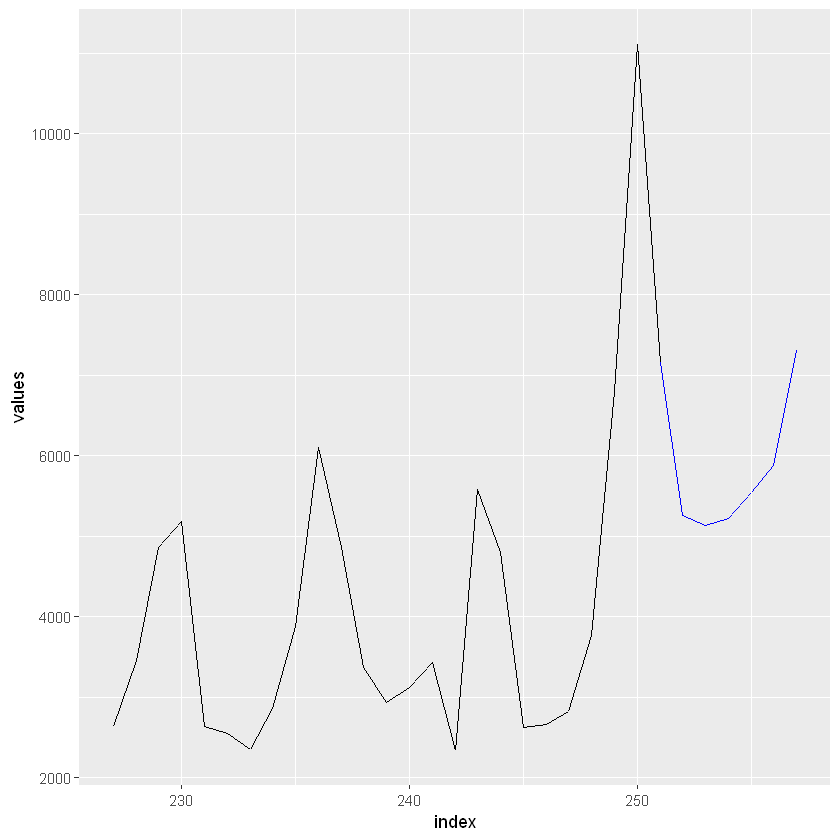

In [105]:
values.highlight <- preds
i$highlight <- ifelse(i$values %in% preds, "blue", "black")
length_ultimos = (max_index - 30):max_index
ggplot(i[length_ultimos,], aes(x = index, y = values, colour = highlight, group = 1)) +
    geom_line() +
    scale_colour_identity(a$highlight)